In [118]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report


In [119]:
#import data
data=pd.read_csv('kidney.csv')

In [120]:
#create dataframe
df = pd.DataFrame(data)

In [121]:
#read the first 10 columns of data
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


there are 26 columns and explanation of these columns:
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet - appetite
pe - pedal edema
ane - anemia
class - class

In [122]:
#look at data types
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [123]:
#look at column names
columns_list = df.columns
columns_list

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [124]:
#lets look unique values of some categorical values
columns_of_interest = [ 'rbc', 'pc', 'pcc', 'ba', 
             'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']  

unique_values = df[columns_of_interest].apply(lambda x: x.unique())
print(unique_values)

rbc                         [nan, normal, abnormal]
pc                          [normal, abnormal, nan]
pcc                      [notpresent, present, nan]
ba                       [notpresent, present, nan]
htn                                  [yes, no, nan]
dm                [yes, no,  yes, \tno, \tyes, nan]
cad                            [no, yes, \tno, nan]
appet                             [good, poor, nan]
pe                                   [no, yes, nan]
ane                                  [no, yes, nan]
classification                 [ckd, ckd\t, notckd]
dtype: object


In [125]:
#i want to look at the number of value "ckd/t" in classification column
column_counts = df['classification'].value_counts()
column_counts

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [126]:
#write the function to replace some values due to label encoding
col_list = ['dm', 'cad', 'classification']  

# Iterate through each column and clean '\tno'
for col in col_list:
    df[col] = df[col].str.replace(r'\t', '').str.strip()

C:\Users\UNISOFT\AppData\Local\Temp\ipykernel_17572\230766684.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'\t', '').str.strip()


In [127]:
#get info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [128]:
#look at shape
df.shape

(400, 26)

In [129]:
#look at statistical info
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [130]:
#since id column does not contain predictive information and is  random , it  doesn't contribute to the predictive power of your mode
#remove this columns
df.drop('id', axis = 1, inplace = True)

In [131]:
#transform columns names
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 
              'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [132]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [133]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


['age' 'blood_pressure' 'specific_gravity' 'albumin' 'sugar'
 'blood_glucose_random' 'blood_urea' 'serum_creatinine' 'sodium'
 'potassium' 'haemoglobin']


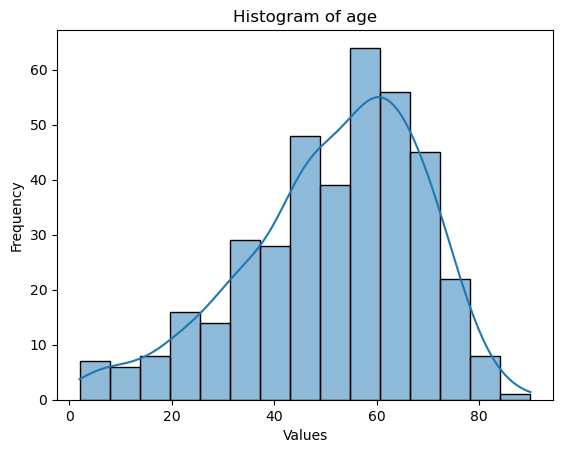

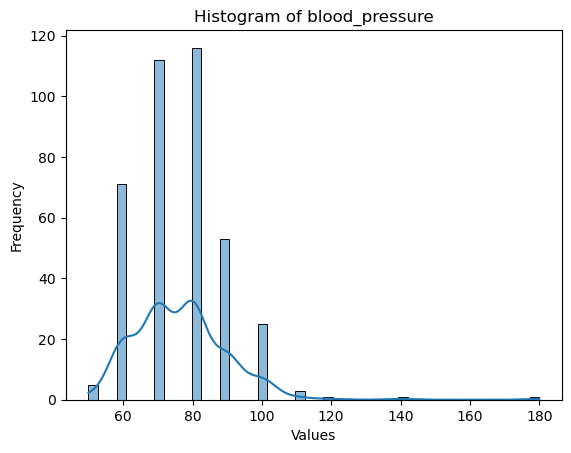

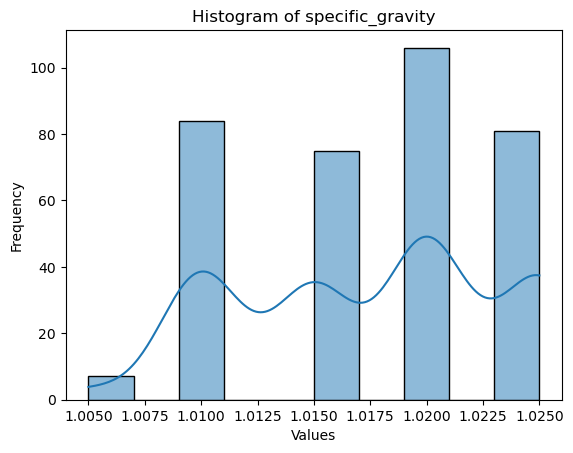

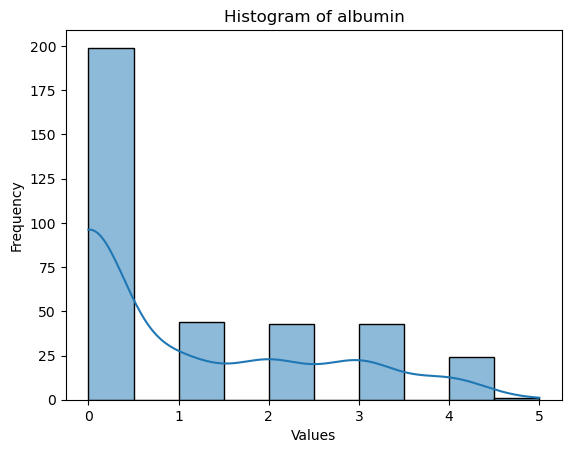

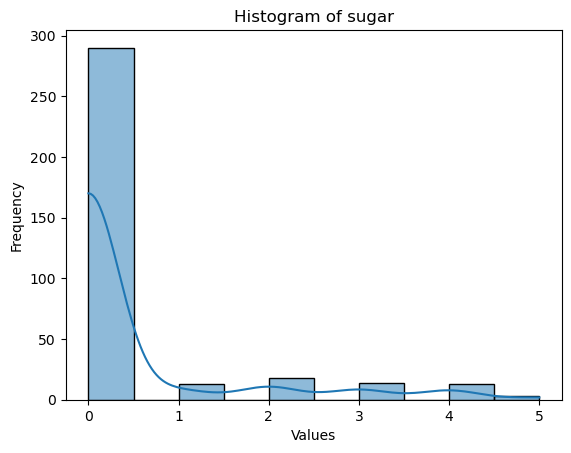

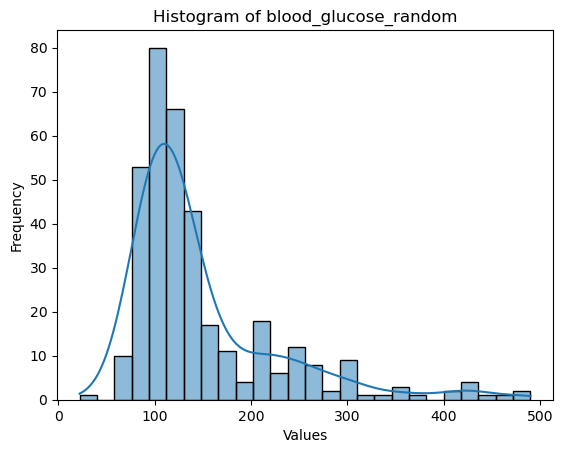

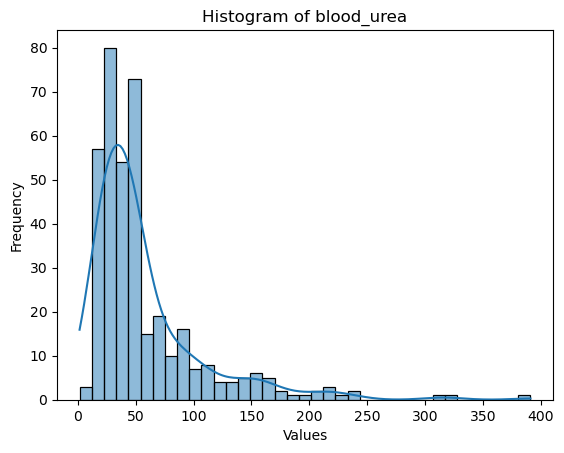

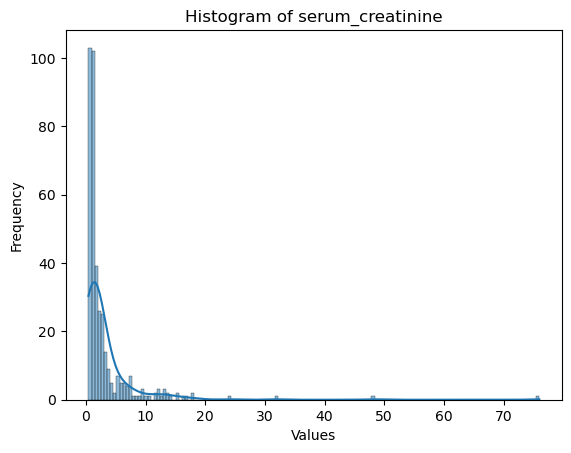

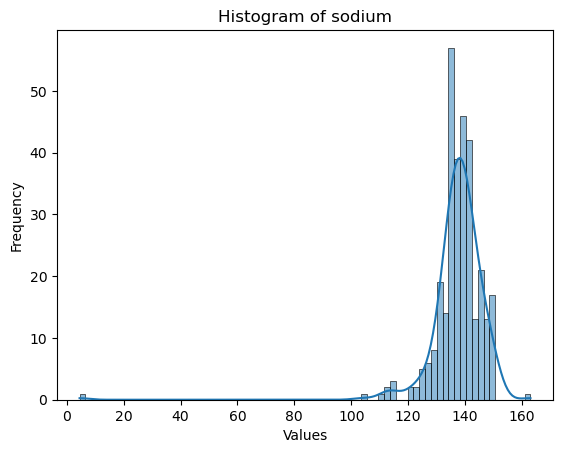

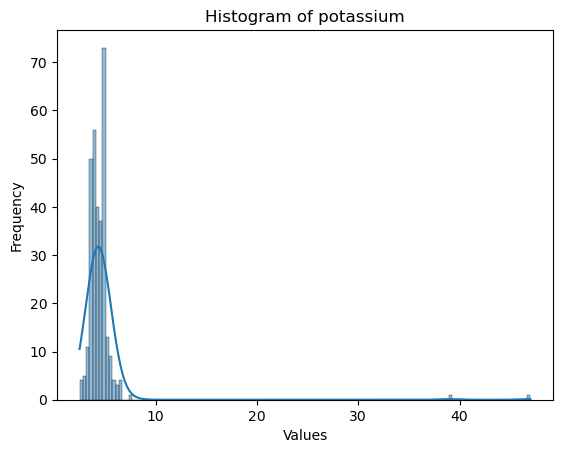

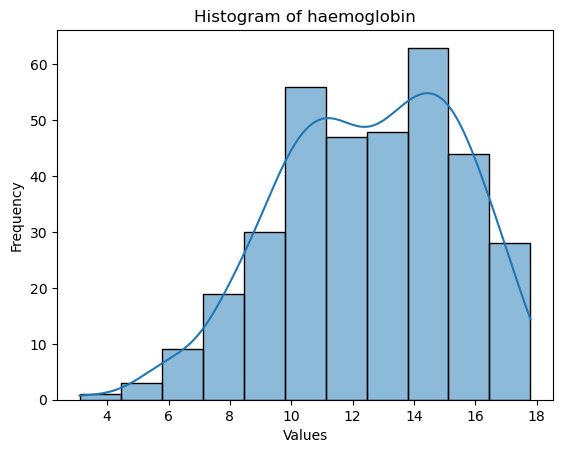

In [134]:
#lets get only numerical data and visualize them
numerical_data = df.select_dtypes(include=[np.number])
numerical_cols = numerical_data.columns.values
print(numerical_cols)
for column in numerical_cols:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


['red_blood_cells' 'pus_cell' 'pus_cell_clumps' 'bacteria'
 'packed_cell_volume' 'white_blood_cell_count' 'red_blood_cell_count'
 'hypertension' 'diabetes_mellitus' 'coronary_artery_disease' 'appetite'
 'peda_edema' 'aanemia' 'class']


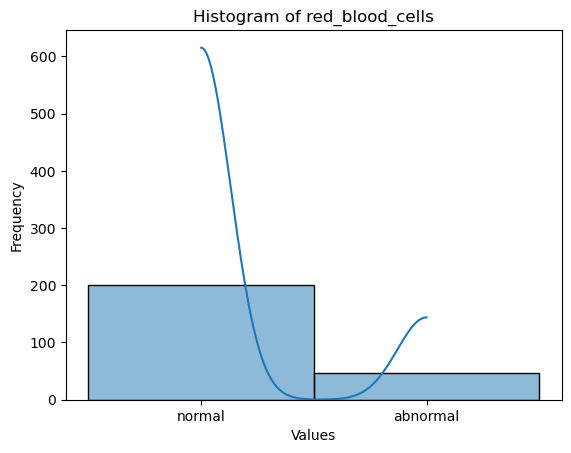

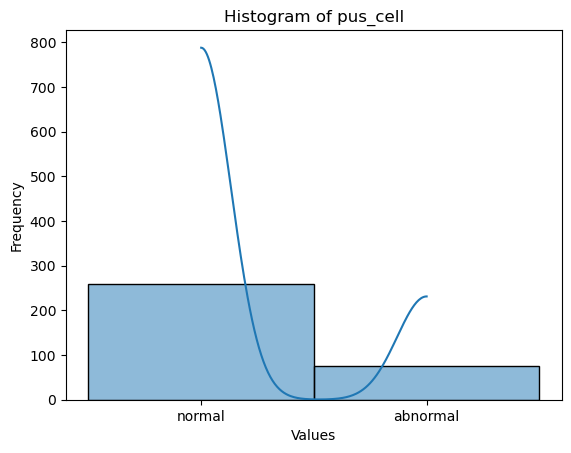

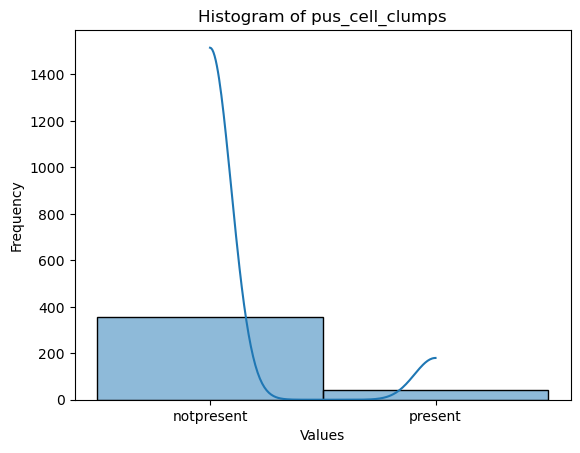

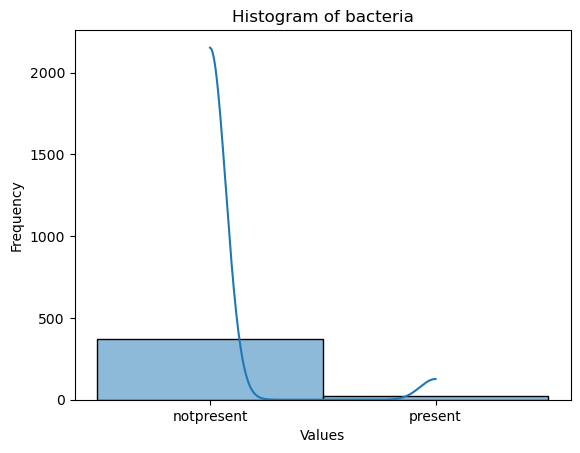

D:\kurulumlar\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


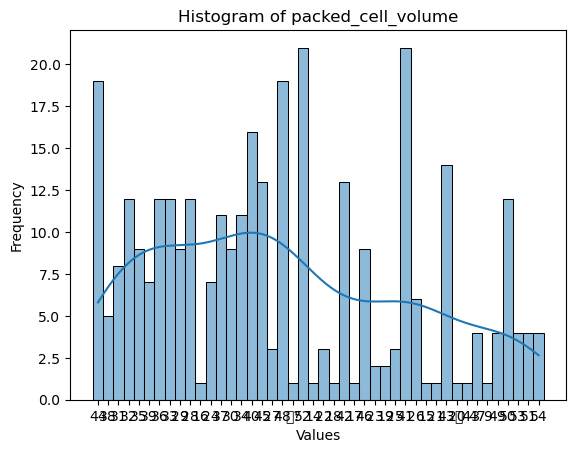

D:\kurulumlar\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


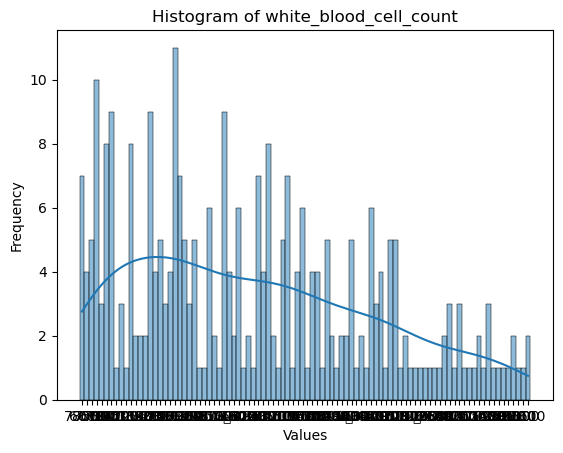

D:\kurulumlar\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


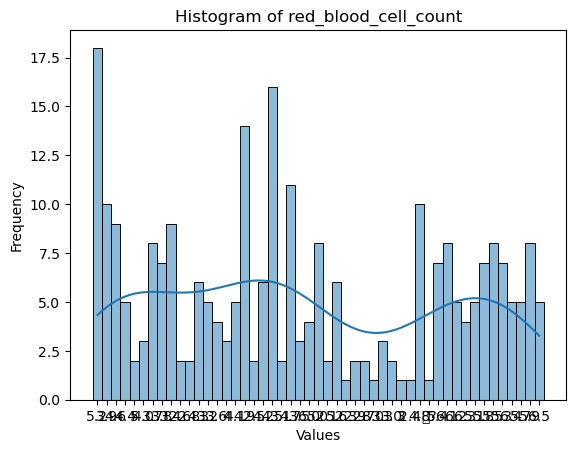

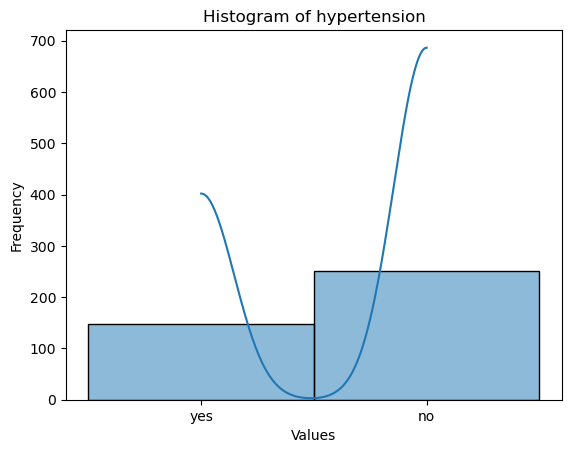

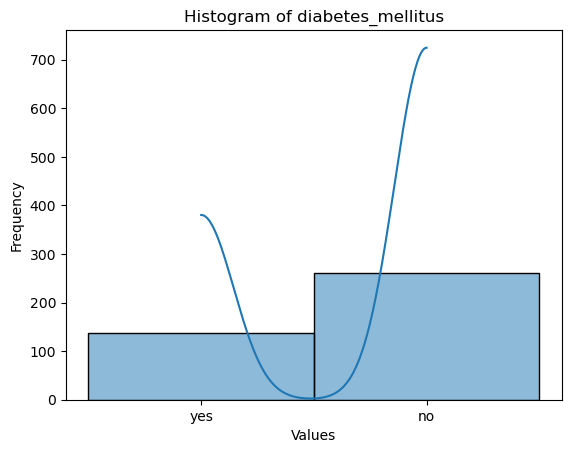

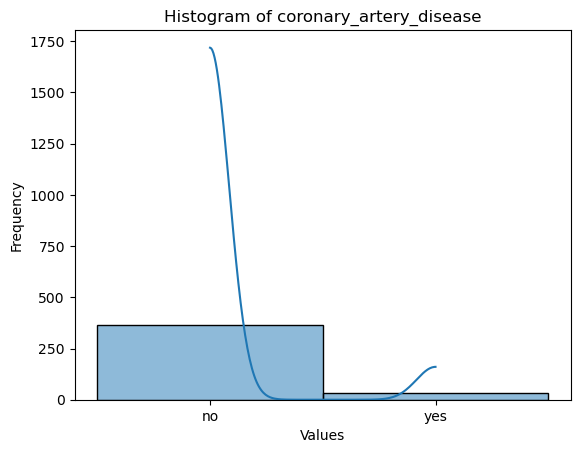

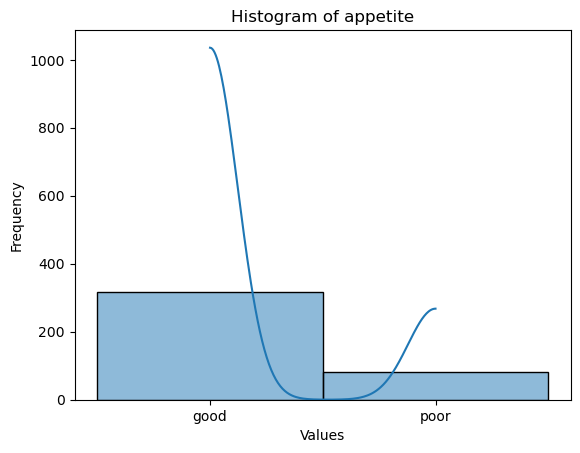

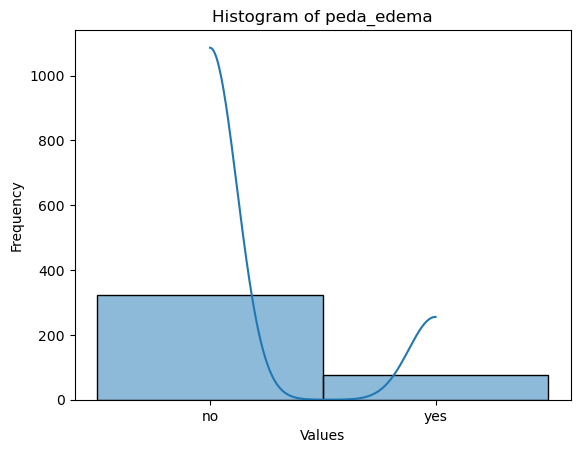

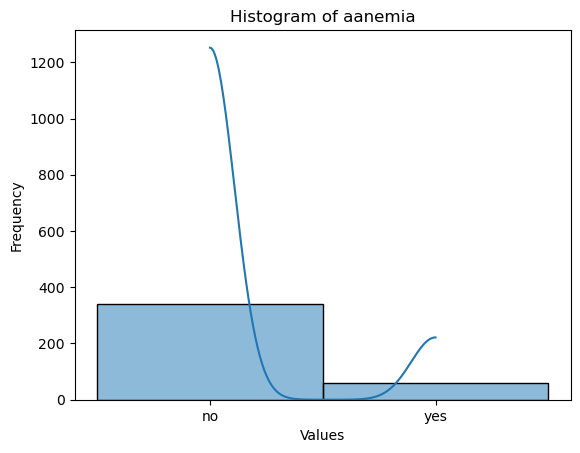

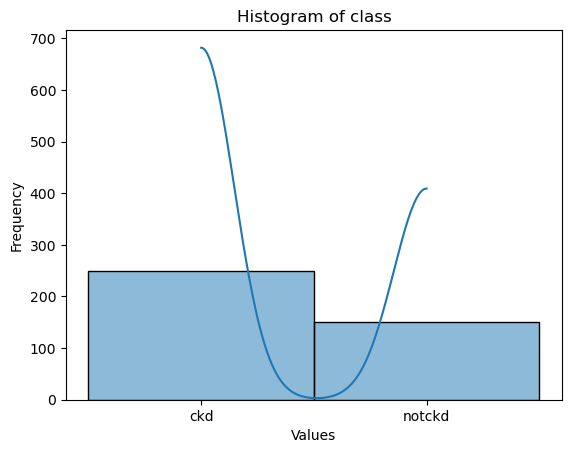

In [135]:
#lets get categorical columns and visualize them
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_cols = categorical_data.columns.values
print(categorical_cols)
for column in categorical_cols:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [136]:
# check duplicates
df.duplicated().sum()

0

<Axes: >

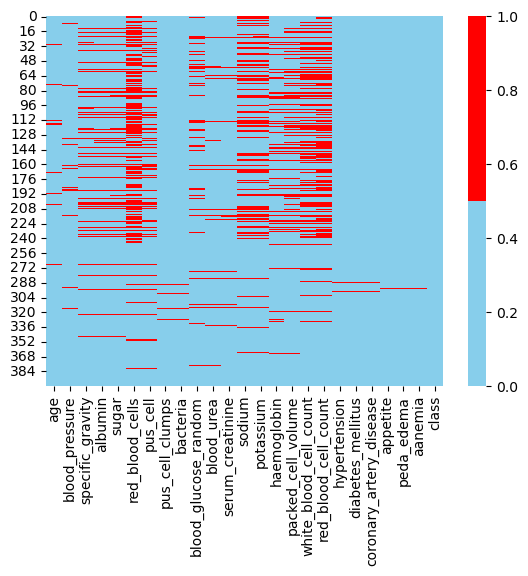

In [137]:

#look at missing values
cols =df.columns
colours = ['#87CEEB', '#FF0000'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [138]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [139]:
#copy data first to do experiment which method is best to fill missing values
data_2=df.copy()

age column,we do experiment on each column to fill missing values

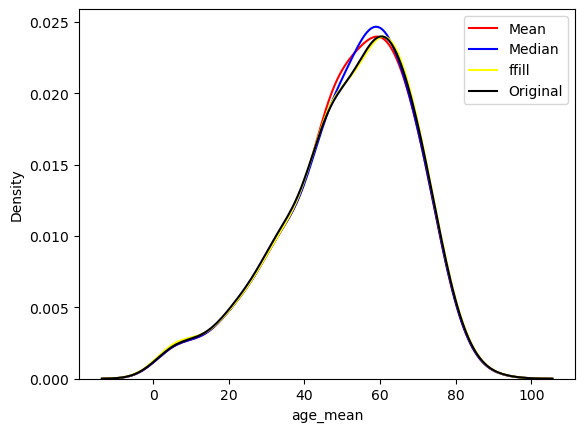

In [140]:
#we use 3 methods mean,median and ffill method and visualize them to see which is near to real data
age_mean = data_2.age.mean()
age_median = data_2.age.median()
data_2['age_mean'] = data_2.age.fillna(age_mean)
data_2['age_median'] = data_2.age.fillna(age_median)
data_2['new_age'] = data_2['age'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['age_mean'],color='red',label='Mean')
sns.kdeplot(data_2['age_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_age'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['age'],color='black',label='Original')
plt.legend()

We have used 3 techniques to compensate for the missing values and we noticed that the last technique called ffill has the best congruent distribution curve on the original distribution curve.

Therefore, it is best suited for this column and therefore we will use it in the original data

In [141]:
#add new column to dataframe
df['age']=data_2['new_age']

BP-blood pressure column

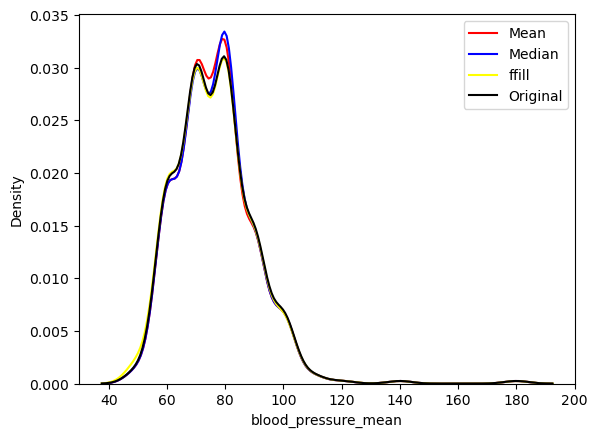

In [142]:
#do experiment for BP column
blood_pressure_mean = data_2.blood_pressure.mean()
blood_pressure_median = data_2.blood_pressure.median()
data_2['blood_pressure_mean'] = data_2.blood_pressure.fillna(blood_pressure_mean)
data_2['blood_pressure_median'] = data_2.blood_pressure.fillna(blood_pressure_median)
data_2['new_blood_pressure'] = data_2['blood_pressure'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['blood_pressure_mean'],color='red',label='Mean')
sns.kdeplot(data_2['blood_pressure_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_blood_pressure'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['blood_pressure'],color='black',label='Original')
plt.legend()

Once again, we note that the last technique is the most appropriate to use in order to compensate for the missing values.

In [143]:
df['blood_pressure']=data_2['new_blood_pressure']

specific gravity column

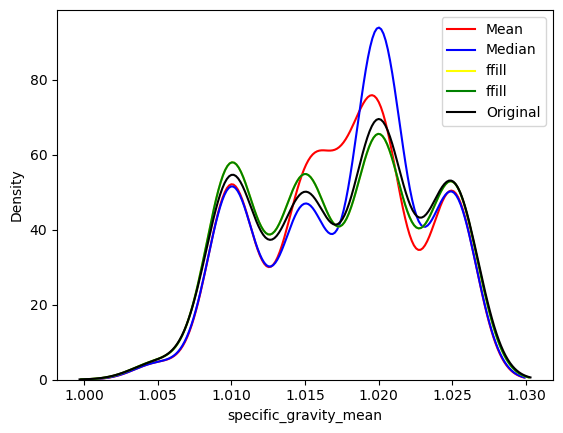

In [144]:
specific_gravity_mean = data_2.specific_gravity.mean()
specific_gravity_median = data_2.specific_gravity.median()
data_2['specific_gravity_mean'] = data_2.specific_gravity.fillna(specific_gravity_mean)
data_2['specific_gravity_median'] = data_2.specific_gravity.fillna(specific_gravity_median)
data_2['new_specific_gravity'] = data_2['specific_gravity'].fillna(method="ffill")
data_2['specific_gravity_new'] = data_2['specific_gravity'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['specific_gravity_mean'],color='red',label='Mean')
sns.kdeplot(data_2['specific_gravity_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_specific_gravity'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['specific_gravity_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['specific_gravity'],color='black',label='Original')
plt.legend()

Here we have used many techniques in order to compensate for the missing values, and we note that the third and fourth technique is the most suitable in the distribution for the original column distribution and therefore we will use any of them.

In [145]:
df['specific_gravity']=data_2['new_specific_gravity']

albumin column

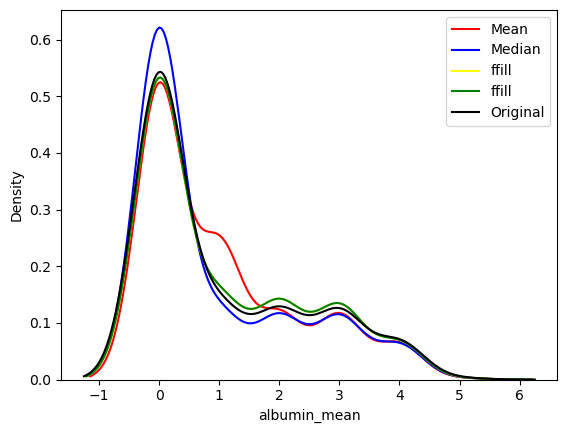

In [146]:
albumin_mean = data_2.albumin.mean()
albumin_median = data_2.albumin.median()
data_2['albumin_mean'] = data_2.albumin.fillna(albumin_mean)
data_2['albumin_median'] = data_2.albumin.fillna(albumin_median)
data_2['new_albumin'] = data_2['albumin'].fillna(method="ffill")
data_2['albumin_new'] = data_2['albumin'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['albumin_mean'],color='red',label='Mean')
sns.kdeplot(data_2['albumin_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_albumin'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['albumin_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['albumin'],color='black',label='Original')
plt.legend()

In [147]:
df['albumin']=data_2['new_albumin']

sugar column


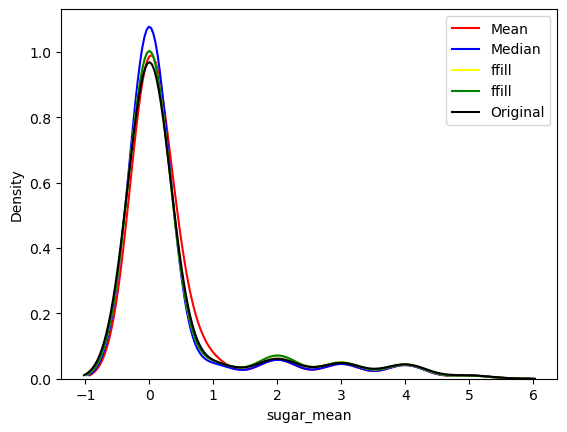

In [148]:
sugar_mean = data_2.sugar.mean()
sugar_median = data_2.sugar.median()
data_2['sugar_mean'] = data_2.sugar.fillna(sugar_mean)
data_2['sugar_median'] = data_2.sugar.fillna(sugar_median)
data_2['new_sugar'] = data_2['sugar'].fillna(method="ffill")
data_2['sugar_new'] = data_2['sugar'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['sugar_mean'],color='red',label='Mean')
sns.kdeplot(data_2['sugar_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_sugar'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['sugar_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['sugar'],color='black',label='Original')
plt.legend()

From the figure, we notice that there is a convergence in the distribution between the first, third and fourth techniques, but at the end of the figure we notice that the most appropriate are the third and fourth, so we will use any of them.

In [149]:
df['sugar']=data_2['new_sugar']

blood glucosa random

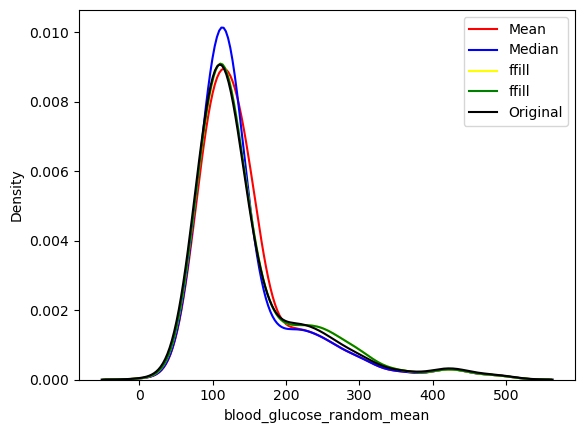

In [150]:
blood_glucose_random_mean = data_2.blood_glucose_random.mean()
blood_glucose_random_median = data_2.blood_glucose_random.median()
data_2['blood_glucose_random_mean'] = data_2.blood_glucose_random.fillna(blood_glucose_random_mean)
data_2['blood_glucose_random_median'] = data_2.blood_glucose_random.fillna(blood_glucose_random_median)
data_2['new_blood_glucose_random'] = data_2['blood_glucose_random'].fillna(method="ffill")
data_2['blood_glucose_random_new'] = data_2['blood_glucose_random'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['blood_glucose_random_mean'],color='red',label='Mean')
sns.kdeplot(data_2['blood_glucose_random_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_blood_glucose_random'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['blood_glucose_random_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['blood_glucose_random'],color='black',label='Original')
plt.legend()

In [151]:
df['blood_glucose_random']=data_2['blood_glucose_random_new']

blood urea

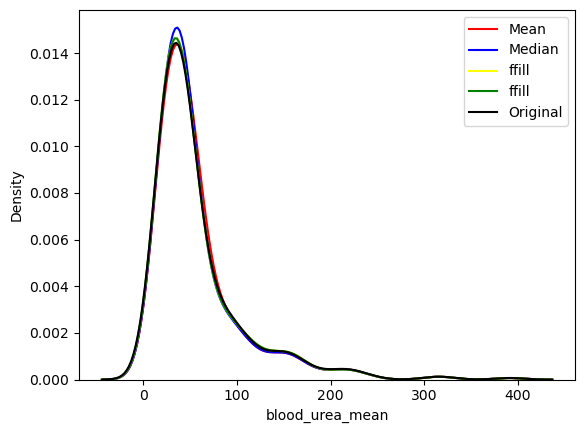

In [152]:
blood_urea_mean = data_2.blood_urea.mean()
blood_urea_median = data_2.blood_urea.median()
data_2['blood_urea_mean'] = data_2.blood_urea.fillna(blood_urea_mean)
data_2['blood_urea_median'] = data_2.blood_urea.fillna(blood_urea_median)
data_2['new_blood_urea'] = data_2['blood_urea'].fillna(method="ffill")
data_2['blood_urea_new'] = data_2['blood_urea'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['blood_urea_mean'],color='red',label='Mean')
sns.kdeplot(data_2['blood_urea_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_blood_urea'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['blood_urea_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['blood_urea'],color='black',label='Original')
plt.legend()

In [153]:
df['blood_urea']=data_2['blood_urea_mean']

serum_creatinine

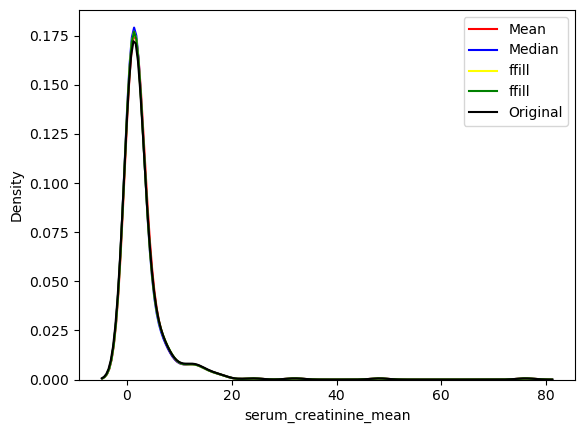

In [154]:
serum_creatinine_mean = data_2.serum_creatinine.mean()
serum_creatinine_median = data_2.serum_creatinine.median()
data_2['serum_creatinine_mean'] = data_2.serum_creatinine.fillna(serum_creatinine_mean)
data_2['serum_creatinine_median'] = data_2.serum_creatinine.fillna(serum_creatinine_median)
data_2['new_serum_creatinine'] = data_2['serum_creatinine'].fillna(method="ffill")
data_2['serum_creatinine_new'] = data_2['serum_creatinine'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['serum_creatinine_mean'],color='red',label='Mean')
sns.kdeplot(data_2['serum_creatinine_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_serum_creatinine'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['serum_creatinine_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['serum_creatinine'],color='black',label='Original')
plt.legend()

In [155]:
df['serum_creatinine']=data_2['serum_creatinine_mean']

sodium column

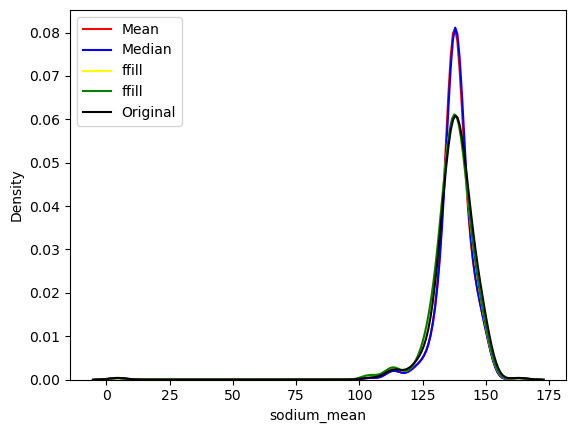

In [156]:
sodium_mean = data_2.sodium.mean()
sodium_median = data_2.sodium.median()
data_2['sodium_mean'] = data_2.sodium.fillna(sodium_mean)
data_2['sodium_median'] = data_2.sodium.fillna(sodium_median)
data_2['new_sodium'] = data_2['sodium'].fillna(method="ffill")
data_2['sodium_new'] = data_2['sodium'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['sodium_mean'],color='red',label='Mean')
sns.kdeplot(data_2['sodium_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_sodium'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['sodium_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['sodium'],color='black',label='Original')
plt.legend()

In [157]:
df['sodium']=data_2['sodium_new']

In [158]:
df['sodium'].head(10)

0      NaN
1      NaN
2      NaN
3    111.0
4    111.0
5    142.0
6    104.0
7    104.0
8    104.0
9    114.0
Name: sodium, dtype: float64

so it become impossible to fill forward since there is nan values respectivly use other method

In [159]:
data_2['sodium']=df['sodium']
sodium_mean = data_2.sodium.mean()
data_2['sodium_mean'] = data_2.sodium.fillna(sodium_mean)

In [160]:
df['sodium']=data_2['sodium_mean']
print(df['sodium'].isnull().sum())

0


potassium column

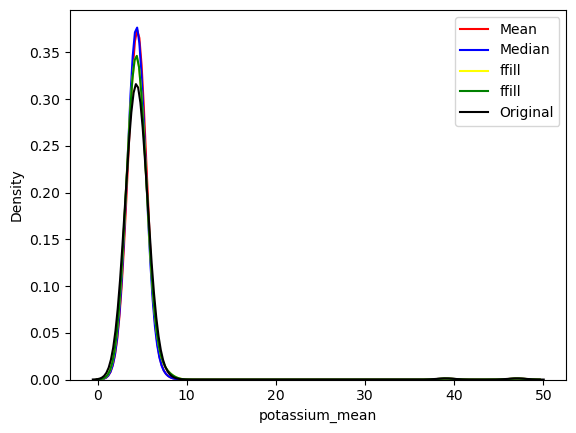

In [161]:
potassium_mean = data_2.potassium.mean()
potassium_median = data_2.potassium.median()
data_2['potassium_mean'] = data_2.potassium.fillna(potassium_mean)
data_2['potassium_median'] = data_2.potassium.fillna(potassium_median)
data_2['new_potassium'] = data_2['potassium'].fillna(method="ffill")
data_2['potassium_new'] = data_2['potassium'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['potassium_mean'],color='red',label='Mean')
sns.kdeplot(data_2['potassium_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_potassium'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['potassium_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['potassium'],color='black',label='Original')
plt.legend()

We note that the most appropriate distribution is the distribution for the second and third techniques, so I will use any of them.

In [162]:
df['potassium']=data_2['potassium_new']

In [163]:
df['potassium'].head()

0    NaN
1    NaN
2    NaN
3    2.5
4    2.5
Name: potassium, dtype: float64

so we face the same issue and we use different method which is best to fill missing value

In [164]:
df['potassium']=data_2['potassium_mean']
print(df['potassium'].isnull().sum())

0


haemoglobin column

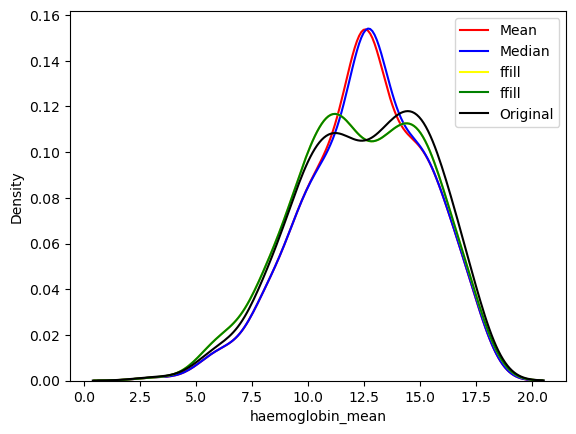

In [165]:
haemoglobin_mean = data_2.haemoglobin.mean()
haemoglobin_median = data_2.haemoglobin.median()
data_2['haemoglobin_mean'] = data_2.haemoglobin.fillna(haemoglobin_mean)
data_2['haemoglobin_median'] = data_2.haemoglobin.fillna(haemoglobin_median)
data_2['new_haemoglobin'] = data_2['haemoglobin'].fillna(method="ffill")
data_2['haemoglobin_new'] = data_2['haemoglobin'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['haemoglobin_mean'],color='red',label='Mean')
sns.kdeplot(data_2['haemoglobin_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_haemoglobin'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['haemoglobin_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['haemoglobin'],color='black',label='Original')
plt.legend()

In [166]:
df['haemoglobin']=data_2['haemoglobin_new']

Now I will start dealing with categorical data.
To make it easier, I will separate the categorical columns from the numerical columns

In [167]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_cols = categorical_data.columns.values
print(categorical_cols)

['red_blood_cells' 'pus_cell' 'pus_cell_clumps' 'bacteria'
 'packed_cell_volume' 'white_blood_cell_count' 'red_blood_cell_count'
 'hypertension' 'diabetes_mellitus' 'coronary_artery_disease' 'appetite'
 'peda_edema' 'aanemia' 'class']


We must deal with categorical data with a lot of sensitivity, and in the real problem, we will review the party responsible for collecting that data in order to review the missing values, so that we can obtain a way that we have done the compensation process more efficiently.

red_blood_cells column

In [168]:
df['red_blood_cells'].isnull().sum()

152

In [169]:
df['red_blood_cells'].value_counts()

normal      201
abnormal     47
Name: red_blood_cells, dtype: int64

<Axes: >

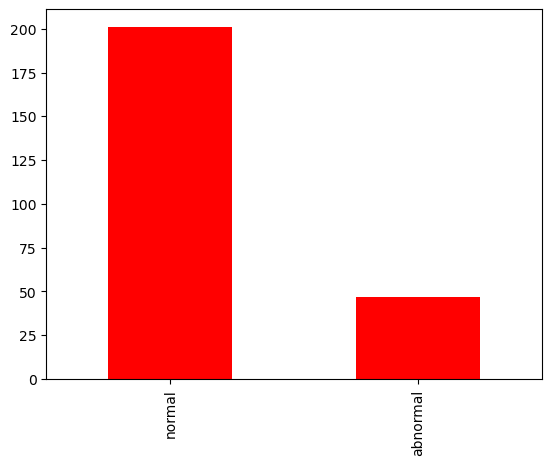

In [170]:
df['red_blood_cells'].value_counts().plot.bar(color='red')

In [171]:
df['red_blood_cells'].fillna(method='ffill', inplace=True)

In [172]:
df['red_blood_cells'].isnull().sum()

2

In [173]:
df['red_blood_cells'].fillna('normal', inplace=True)

In [174]:
df['red_blood_cells'].value_counts()

normal      291
abnormal    109
Name: red_blood_cells, dtype: int64

pus_cell



In [175]:
df['pus_cell'].isnull().sum()

65

In [176]:
df['pus_cell'].value_counts()

normal      259
abnormal     76
Name: pus_cell, dtype: int64

In [177]:
df['pus_cell'].fillna(method='ffill', inplace=True)

<Axes: >

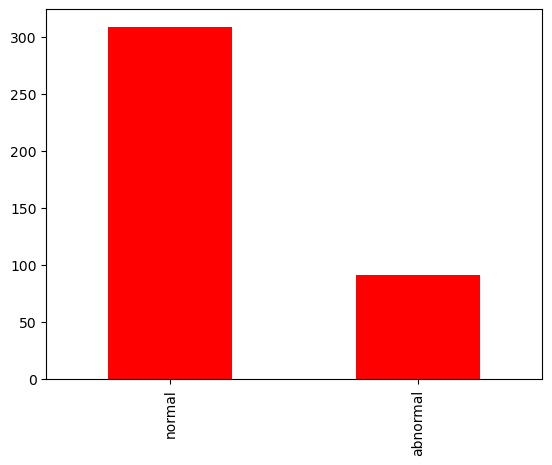

In [178]:
df['pus_cell'].value_counts().plot.bar(color='red')

In [179]:
df['pus_cell'].value_counts()

normal      309
abnormal     91
Name: pus_cell, dtype: int64

pus_cell_clumps column

In [180]:
df['pus_cell_clumps'].isnull().sum()

4

In [181]:
df['pus_cell_clumps'].value_counts()

notpresent    354
present        42
Name: pus_cell_clumps, dtype: int64

In [182]:
df['pus_cell_clumps'].fillna(method='ffill', inplace=True)

<Axes: >

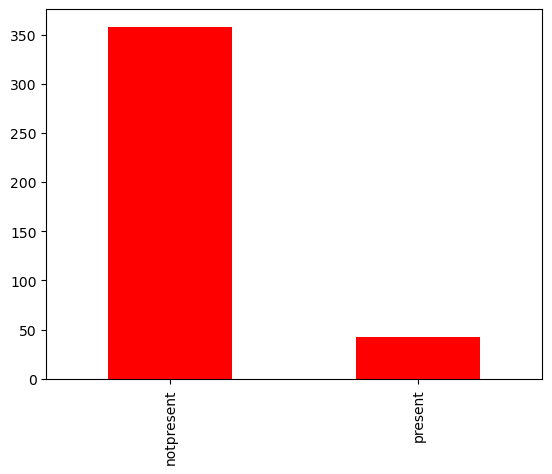

In [183]:
df['pus_cell_clumps'].value_counts().plot.bar(color='red')

bacteria column

In [184]:
df['bacteria'].value_counts()

notpresent    374
present        22
Name: bacteria, dtype: int64

In [185]:
df['bacteria'].fillna(method='ffill', inplace=True)

<Axes: >

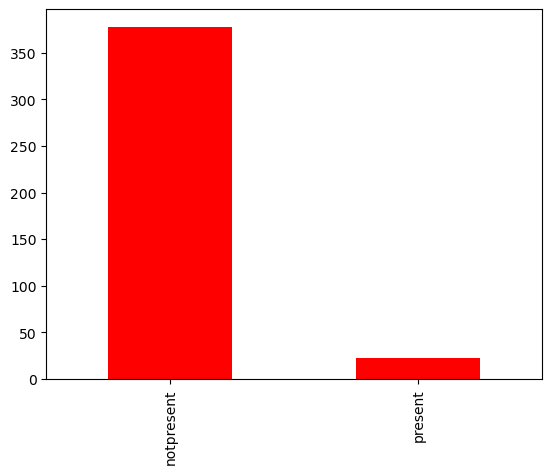

In [186]:
df['bacteria'].value_counts().plot.bar(color='red')

hypertension

In [187]:
df['hypertension'].isnull().sum()

2

In [188]:
df['hypertension'].value_counts()

no     251
yes    147
Name: hypertension, dtype: int64

<Axes: >

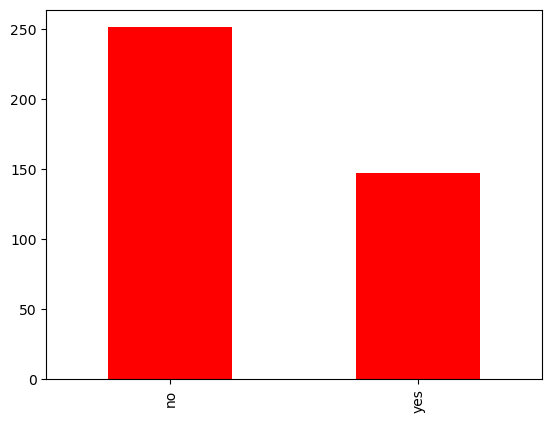

In [189]:
df['hypertension'].value_counts().plot.bar(color='red')

In [190]:
df['hypertension'].fillna(method='ffill', inplace=True)

In [191]:
df['hypertension'].isnull().sum()

0

diabetes_mellitus

In [192]:
df['diabetes_mellitus'].isnull().sum()

2

In [193]:
df['diabetes_mellitus'].value_counts()

no     261
yes    137
Name: diabetes_mellitus, dtype: int64

<Axes: >

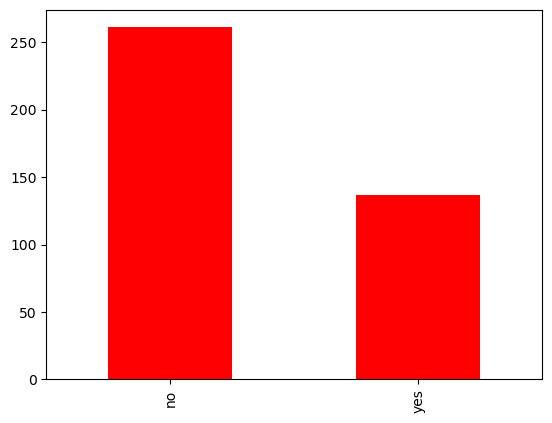

In [194]:
df['diabetes_mellitus'].value_counts().plot.bar(color='red')

In [195]:
df['diabetes_mellitus'].fillna(method='ffill', inplace=True)

In [196]:
df['diabetes_mellitus'].isnull().sum()

0

coronary_artery_disease

In [197]:
df['coronary_artery_disease'].isnull().sum()

2

In [198]:
df['coronary_artery_disease'].value_counts()

no     364
yes     34
Name: coronary_artery_disease, dtype: int64

<Axes: >

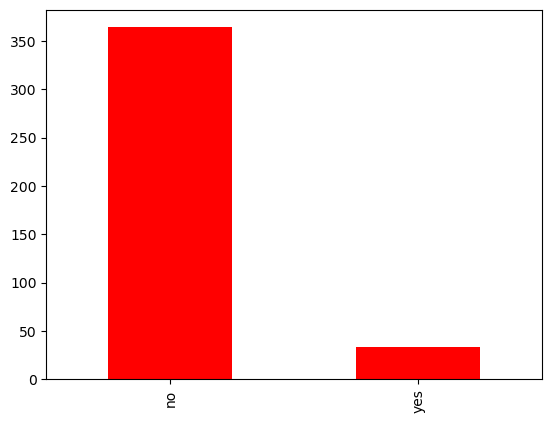

In [199]:
df['coronary_artery_disease'].value_counts().plot.bar(color='red')

In [200]:
df['coronary_artery_disease'].fillna(method='ffill', inplace=True)

In [201]:
df['coronary_artery_disease'].isnull().sum()

0

appetite column

In [202]:
df['appetite'].value_counts()

good    317
poor     82
Name: appetite, dtype: int64

In [203]:
df['appetite'].fillna(method='ffill', inplace=True)

In [204]:
df['appetite'].isnull().sum()

0

peda_edema

In [205]:
df['peda_edema'].isnull().sum()

1

In [206]:
df['peda_edema'].fillna(method='ffill',inplace=True)

In [207]:
df['peda_edema'].isnull().sum()

0

anemia column

In [208]:
df['aanemia'].value_counts()

no     339
yes     60
Name: aanemia, dtype: int64

In [209]:
df['aanemia'].isnull().sum()

1

In [210]:
df['aanemia'].fillna(method='ffill',inplace=True)

In [211]:
df['aanemia'].isnull().sum()

0

packed_cell_volume

In [212]:
df['packed_cell_volume'].isnull().sum()

70

In [213]:
df['packed_cell_volume'].value_counts()

41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: packed_cell_volume, dtype: int64

In [214]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace('\t?', " ")

In [215]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace('\t43', 15)

In [226]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce').astype('Int64')


In [227]:
df['packed_cell_volume'].value_counts()

41    21
52    21
44    19
48    19
40    16
43    14
42    13
45    13
32    12
50    12
36    12
33    12
28    12
34    11
37    11
30     9
29     9
35     9
46     9
31     8
24     7
39     7
26     6
38     5
53     4
51     4
49     4
47     4
54     4
25     3
27     3
22     3
19     2
15     2
23     2
21     1
20     1
17     1
9      1
18     1
14     1
16     1
Name: packed_cell_volume, dtype: Int64

In [228]:
df['packed_cell_volume'].dtype

Int64Dtype()

In [231]:
df['packed_cell_volume'].unique()

<IntegerArray>
[  44,   38,   31,   32,   35,   39,   36,   33,   29,   28, <NA>,   16,   24,
   37,   30,   34,   40,   45,   27,   48,   52,   14,   22,   18,   42,   17,
   46,   23,   19,   25,   41,   26,   15,   21,   43,   20,   47,    9,   49,
   50,   53,   51,   54]
Length: 43, dtype: Int64

since there is error,we  should fix it, asagidaki kod islemedi ve datanin ededlerini daha da boyutdu.
how can i fix it?

In [ ]:
pcv_mean = data_2.pcv.mean()
pcv_median = data_2.pcv.median()
data_2['pcv_mean'] = data_2.pcv.fillna(pcv_mean)
data_2['pcv_median'] = data_2.pcv.fillna(pcv_median)
data_2['new_pcv'] = data_2['pcv'].fillna(method="ffill")
data_2['pcv_new'] = data_2['pcv'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['pcv_mean'],color='red',label='Mean')
sns.kdeplot(data_2['pcv_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_pcv'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['pcv_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['pcv'],color='black',label='Original')
plt.legend()